In [1]:
import numpy
numpy.object=numpy.object_
numpy.bool=numpy.bool_
numpy.float = numpy.float64
numpy.int = numpy.int_

In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from random import shuffle
import os
import matplotlib.pyplot as plt
import pathlib
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense

from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [3]:
path="C:\\Users\\badhr\\Downloads\\4wyymrcpyz-1\\4wyymrcpyz-1\\4wyymrcpyz-1\\BANANA DISEASE"
data = {"imgpath": [] , "labels": [] }

category = os.listdir(path)
for folder in category:
    folderpath = os.path.join(path , folder)
    print(folderpath)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["imgpath"].append(fpath)
        data["labels"].append(folder)
      

df = pd.DataFrame(data) 
from sklearn.preprocessing import LabelEncoder
#Convert labels to numbers
lb = LabelEncoder()
df['encoded_labels'] = lb.fit_transform(df['labels'])
df

C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcpyz-1\4wyymrcpyz-1\BANANA DISEASE\RESIZED BACTERIAL SOFT ROT
C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcpyz-1\4wyymrcpyz-1\BANANA DISEASE\RESIZED BANANA APHIDS
C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcpyz-1\4wyymrcpyz-1\BANANA DISEASE\RESIZED BANANA FRUIT- SCARRING BEETLE
C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcpyz-1\4wyymrcpyz-1\BANANA DISEASE\RESIZED BLACK SIGATOKA
C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcpyz-1\4wyymrcpyz-1\BANANA DISEASE\RESIZED PANAMA DISEASE TEST
C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcpyz-1\4wyymrcpyz-1\BANANA DISEASE\RESIZED PSEUDOSTEM WEEVIL
C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcpyz-1\4wyymrcpyz-1\BANANA DISEASE\RESIZED YELLOW SIGATOKA


,imgpath,labels,encoded_labels
0,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED BACTERIAL SOFT ROT,0
1,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED BACTERIAL SOFT ROT,0
2,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED BACTERIAL SOFT ROT,0
3,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED BACTERIAL SOFT ROT,0
4,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED BACTERIAL SOFT ROT,0
...,...,...,...
5619,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED YELLOW SIGATOKA,6
5620,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED YELLOW SIGATOKA,6
5621,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED YELLOW SIGATOKA,6
5622,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED YELLOW SIGATOKA,6


In [4]:
for i in range(7):
    print(i,list(df["encoded_labels"]).count(i))

0 1077
1 366
2 300
3 473
4 408
5 2736
6 264


In [5]:
df=pd.concat([df[df['labels']=='RESIZED PANAMA DISEASE TEST'][0:300],df[df['labels']=='RESIZED YELLOW SIGATOKA'][0:300],df[df['labels']=='RESIZED BACTERIAL SOFT ROT'][0:300],df[df['labels']=='RESIZED BANANA APHIDS'][0:300],df[df['labels']=='RESIZED BLACK SIGATOKA'][0:300],df[df['labels']=='RESIZED PSEUDOSTEM WEEVIL'][0:300]])
df.reset_index()

,index,imgpath,labels,encoded_labels
0,2216,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED PANAMA DISEASE TEST,4
1,2217,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED PANAMA DISEASE TEST,4
2,2218,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED PANAMA DISEASE TEST,4
3,2219,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED PANAMA DISEASE TEST,4
4,2220,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED PANAMA DISEASE TEST,4
...,...,...,...,...
1759,2919,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED PSEUDOSTEM WEEVIL,5
1760,2920,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED PSEUDOSTEM WEEVIL,5
1761,2921,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED PSEUDOSTEM WEEVIL,5
1762,2922,C:\Users\badhr\Downloads\4wyymrcpyz-1\4wyymrcp...,RESIZED PSEUDOSTEM WEEVIL,5


In [6]:
for i in range(7):
    print(i,list(df["encoded_labels"]).count(i))

0 300
1 300
2 0
3 300
4 300
5 300
6 264


# Dataset preprocessing

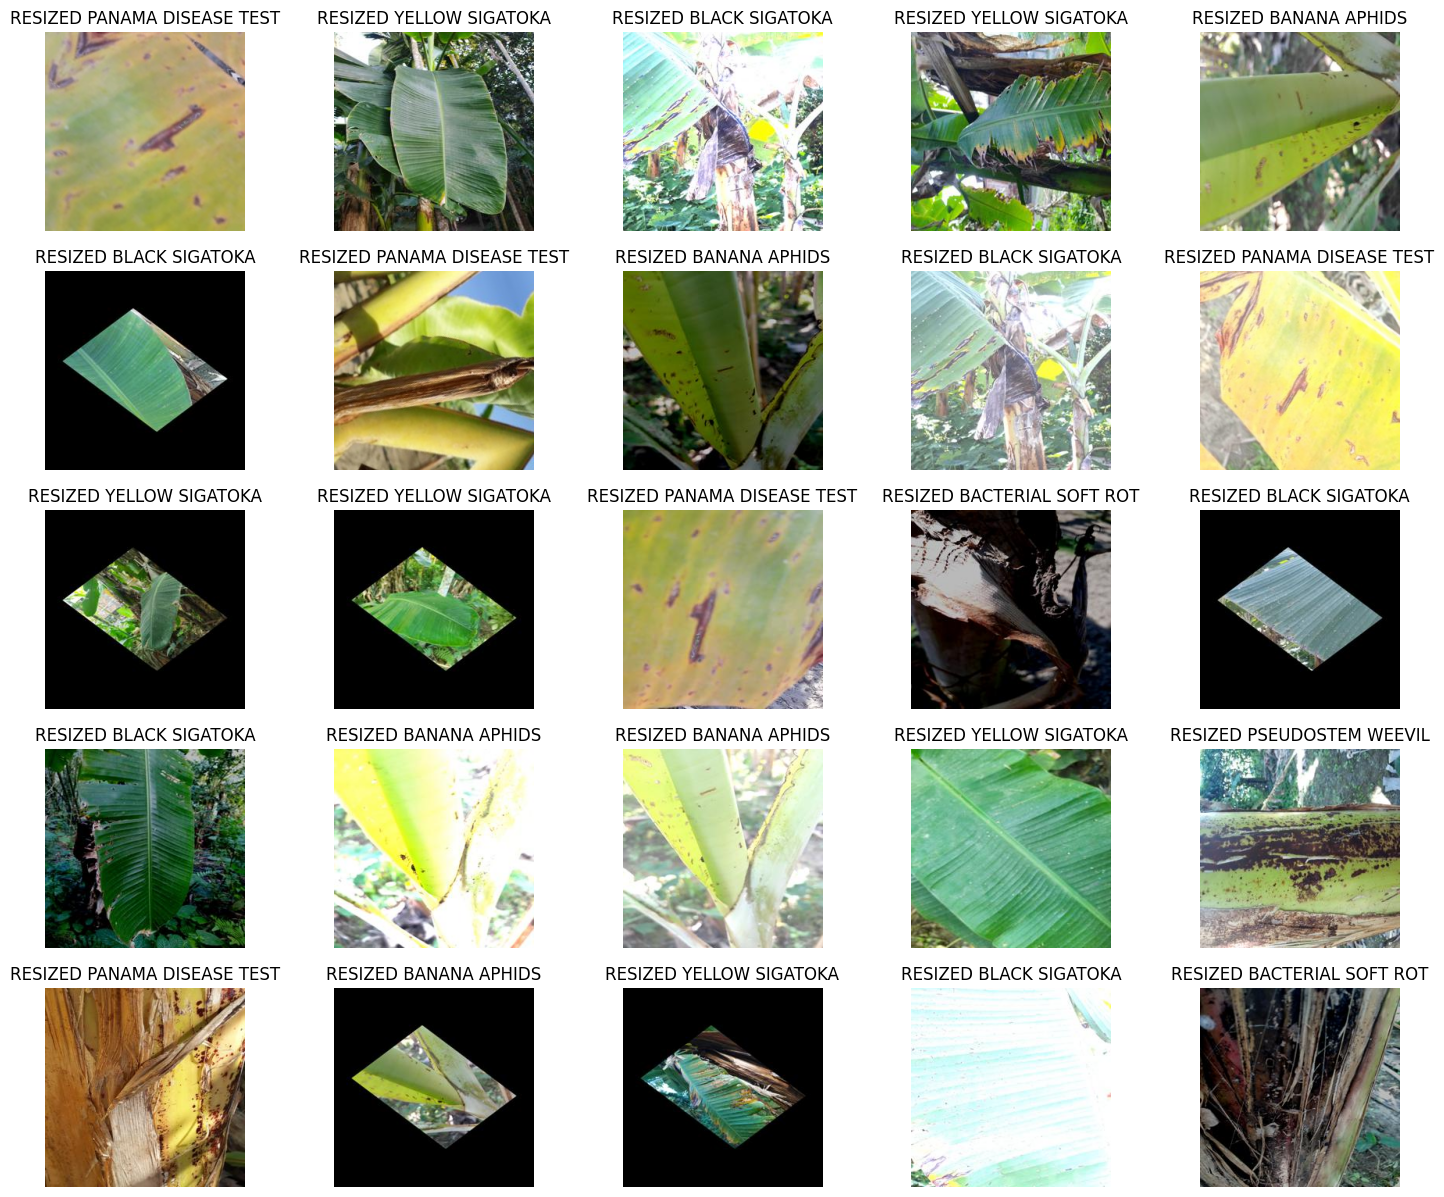

In [7]:
plt.figure(figsize=(18,15))
for i, row in df.sample(n=25).reset_index().iterrows():
    plt.subplot(5,5,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_df, Temp_df = train_test_split(df,  train_size= 0.70 , shuffle=True, random_state=124)
valid_df , test_df = train_test_split(Temp_df ,  train_size= 0.70 , shuffle=True, random_state=124)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [9]:
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)


generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    # there could be image augmentation here
)

# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

val_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 1234 validated image filenames belonging to 6 classes.
Found 371 validated image filenames belonging to 6 classes.
Found 159 validated image filenames belonging to 6 classes.


# Mobilenet Model

In [10]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = MobileNet(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # Change 'num_classes' to the number of your classes

model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_images, epochs=10, validation_data=(val_images), )

C:\Users\badhr\anaconda3\envs\gpu_3_9\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
39/39 [==============================] - 27s 471ms/step - loss: 0.4322 - accuracy: 0.8574 - val_loss: 0.4700 - val_accuracy: 0.8140
Epoch 2/10
39/39 [==============================] - 9s 242ms/step - loss: 0.0320 - accuracy: 0.9968 - val_loss: 0.0779 - val_accuracy: 0.9811
Epoch 3/10
39/39 [==============================] - 8s 196ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 0.9811
Epoch 4/10
39/39 [==============================] - 8s 217ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9946
Epoch 5/10
39/39 [==============================] - 8s 217ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 0.9973
Epoch 6/10
39/39 [==============================] - 9s 221ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 0.9946
Epoch 7/10
39/39 [==============================] - 9s 225ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9946
Epoch

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0     

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# MobileNet model results

Confusion matrix, without normalization
                             precision    recall  f1-score   support

 RESIZED BACTERIAL SOFT ROT       1.00      1.00      1.00        29
      RESIZED BANANA APHIDS       1.00      1.00      1.00        25
     RESIZED BLACK SIGATOKA       1.00      1.00      1.00        30
RESIZED PANAMA DISEASE TEST       1.00      1.00      1.00        28
  RESIZED PSEUDOSTEM WEEVIL       1.00      1.00      1.00        24
    RESIZED YELLOW SIGATOKA       1.00      1.00      1.00        23

                   accuracy                           1.00       159
                  macro avg       1.00      1.00      1.00       159
               weighted avg       1.00      1.00      1.00       159



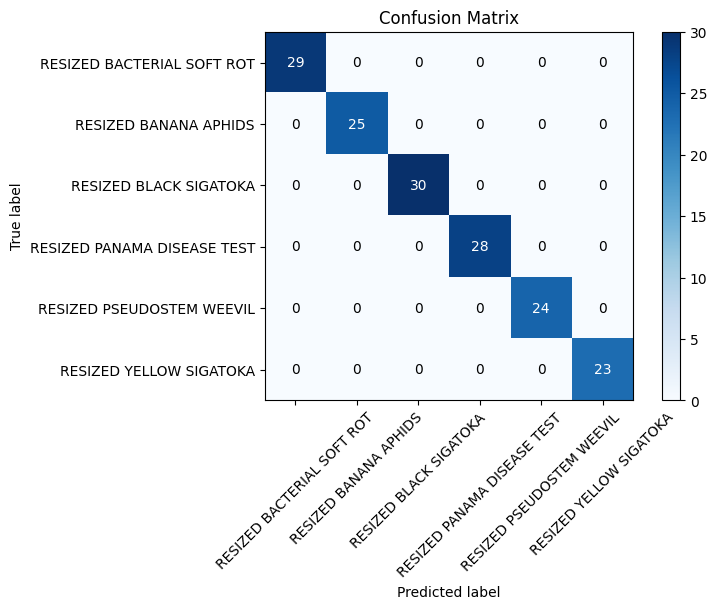

array([[29,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0],
       [ 0,  0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  0, 23]], dtype=int64)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

# Make predictions on the test data
test_images.reset()
y_pred = model.predict(test_images)
Y_test = test_images.classes
#print(Y_test,y_pred)

# Get class labels
class_labels = list(test_images.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(Y_test, np.argmax(y_pred, axis=1))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=class_labels, title='Confusion Matrix')

# If you want to save the confusion matrix plot to a file, you can use the following line:
plt.savefig('confusion_matrix.png')

# Print classification report
print(classification_report(Y_test, np.argmax(y_pred, axis=1), target_names=class_labels))

# Show the plot
plt.show()
cm

# VGG Net Model

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # Change 'num_classes' to the number of your classes

model = Model(inputs=base_model.input, outputs=predictions)

In [16]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_images, epochs=10, validation_data=(val_images), )

C:\Users\badhr\anaconda3\envs\gpu_3_9\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
39/39 [==============================] - 55s 944ms/step - loss: 1.2379 - accuracy: 0.5543 - val_loss: 1.2632 - val_accuracy: 0.5202
Epoch 2/10
39/39 [==============================] - 26s 676ms/step - loss: 0.5387 - accuracy: 0.8266 - val_loss: 0.2295 - val_accuracy: 0.9164
Epoch 3/10
39/39 [==============================] - 25s 637ms/step - loss: 0.1489 - accuracy: 0.9530 - val_loss: 0.4947 - val_accuracy: 0.8383
Epoch 4/10
39/39 [==============================] - 23s 598ms/step - loss: 0.2244 - accuracy: 0.9287 - val_loss: 0.1962 - val_accuracy: 0.9380
Epoch 5/10
39/39 [==============================] - 25s 647ms/step - loss: 0.1418 - accuracy: 0.9449 - val_loss: 1.2389 - val_accuracy: 0.7439
Epoch 6/10
39/39 [==============================] - 24s 609ms/step - loss: 0.3259 - accuracy: 0.8987 - val_loss: 0.1312 - val_accuracy: 0.9407
Epoch 7/10
39/39 [==============================] - 24s 614ms/step - loss: 0.1270 - accuracy: 0.9579 - val_loss: 0.1092 - val_accuracy: 0.9677

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

# VGGNet model results

Confusion matrix, without normalization
                             precision    recall  f1-score   support

 RESIZED BACTERIAL SOFT ROT       1.00      1.00      1.00        29
      RESIZED BANANA APHIDS       1.00      1.00      1.00        25
     RESIZED BLACK SIGATOKA       0.97      1.00      0.98        30
RESIZED PANAMA DISEASE TEST       1.00      1.00      1.00        28
  RESIZED PSEUDOSTEM WEEVIL       1.00      1.00      1.00        24
    RESIZED YELLOW SIGATOKA       1.00      0.96      0.98        23

                   accuracy                           0.99       159
                  macro avg       0.99      0.99      0.99       159
               weighted avg       0.99      0.99      0.99       159



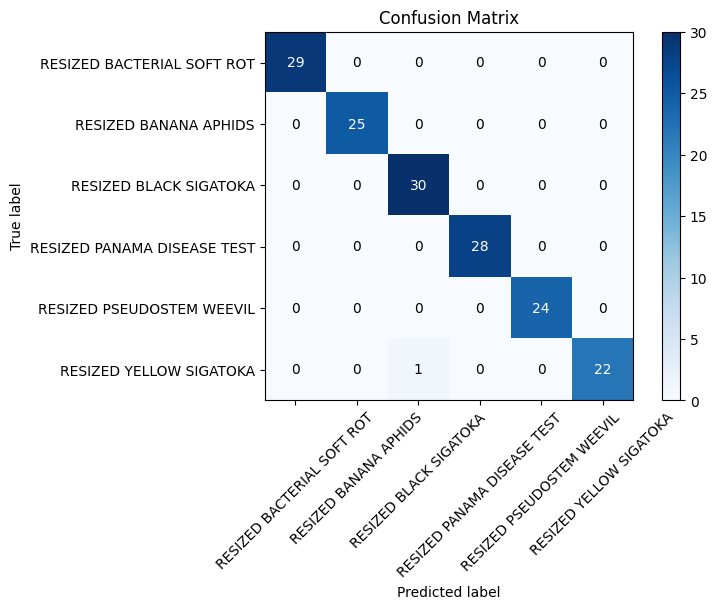

array([[29,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0],
       [ 0,  0,  0,  0, 24,  0],
       [ 0,  0,  1,  0,  0, 22]], dtype=int64)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

# Make predictions on the test data
test_images.reset()
y_pred = model.predict(test_images)
Y_test = test_images.classes
#print(Y_test,y_pred)

# Get class labels
class_labels = list(test_images.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(Y_test, np.argmax(y_pred, axis=1))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=class_labels, title='Confusion Matrix')

# If you want to save the confusion matrix plot to a file, you can use the following line:
plt.savefig('confusion_matrix.png')

# Print classification report
print(classification_report(Y_test, np.argmax(y_pred, axis=1), target_names=class_labels))

# Show the plot
plt.show()
cm

In [18]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
